In [2]:
import numpy as np
from scipy.integrate import simps
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Exemplo 1

Determine $ \phi$ e f para $O_2(g)$ a 1000 bar e 0ºC a partir dos seguintes dados:

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|p(bar)   |  1 | 100  | 200  | 300  | 400  | 500  | 600  | 700  | 800  | 900  | 1000  |
|$V_m$ (L/mol)   | 22.710  | 0.2098  | 0.1045  | 0.0715  | 0.0601  | 0.0527  | 0.0471  | 0.0443  | 0.0420  | 0.0403  | 0.0.384  |

## Solução

Para gases reais: $ ln\phi = \int_{0}^{p} \frac{Z-1}{p} dp$

$Z = \frac{V_m}{V_{m,id}} = \frac{pV_m}{RT}$

Substituindo a definição e Z na primeira equação:

$ ln\phi = \int_{0}^{p} (\frac{V_m}{RT} -\frac{1}{p})dp$

A área sob o gráfico de $(\frac{V_m}{RT} -\frac{1}{p})$ versus p é exatamente a $ln \phi$.

In [3]:
p = np.array([1.,100., 200., 300., 400., 500., 600., 700., 800., 900., 1000.])
V = np.array([22.710, 0.2098, 0.1045, 0.0715, 0.0601, 0.0527, 0.0471, 0.0443, 0.0420, 0.0403, 0.0384])

R = 0.08314   # L bar / K mol
T = 273.15    # K
pi = 1000.0    # bar

ordenada = V/(R*T) - 1/p

#ln_phi = simps(ordenada, p)  # integração usando a regra de Simpson

ln_phi = trapz(ordenada, p)  # integração usando a regra de trapézio

phi = np.exp(ln_phi) 
f = pi * phi


print('Coeficiente de fugacidade = ' + format(phi , '6.3f'))
print('Fugacidade (bar) = ' + format(f, '6.3e'))

Coeficiente de fugacidade =  1.182
Fugacidade (bar) = 1.182e+03


<function matplotlib.pyplot.show>

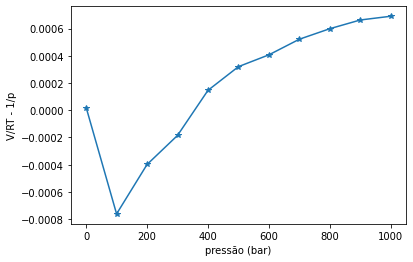

In [4]:
#vamos construir o gráfico só para ilustrar a forma dele.

plt.plot(p,ordenada,'-*')
plt.xlabel('pressão (bar)')
plt.ylabel('V/RT - 1/p')
plt.show

## Exemplo 2

O fator de compressibilidade do $O_2(g)$ a baixas pressões e 0ºC é uma função linear, como pode ser observado pelos dados abaixo. Determine $B_p$ para o $O_2(g)$ nestas condições.

|   |   |   |   |   |   | 
|---|---|---|---|---|---|
|p(bar)   |  1. | 2.00  | 3.00  | 4.00  | 5.00  |
|Z| 1.0000  | 0.9990  | 0.9980  | 0.9971  | 0.9961  |

## Solução

A expansão do virial truncada no segundo termo é $ Z = 1 + (B_p /RT) p$. Logo, um gráfico de Z em função de p terá coeficiente angular $\frac{B_p}{RT}$.

In [6]:
# Inicializando as variáveis
R = 0.08314   # bar L / K mol
T = 273.15    # K

p = np.array([1.,2.00, 3.00, 4.00, 5.00])
Z = np.array([1.0000, 0.9990, 0.9980, 0.9971, 0.9961])

#Regressão linear
deg = 1
z = np.polyfit(p, Z, deg)
y = np.poly1d(z)

#Cálculo de Bp
Bp = z[0]*R*T

print('Bp (L/mol)= ' + format(Bp , '6.3f'))

Bp (L/mol)= -0.022


<function matplotlib.pyplot.show>

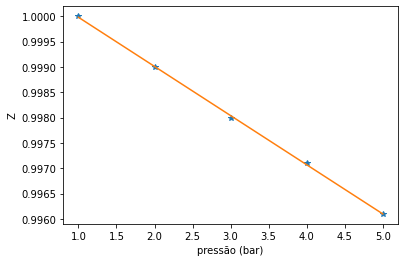

In [7]:
#vamos construir o gráfico só para ilustrar a forma dele.

plt.plot(p,Z,'*')
plt.plot(p,y(p))
plt.xlabel('pressão (bar)')
plt.ylabel('Z')
plt.show

## Exemplo 3

Na temperatura de Boyle, o gráfico de Z contra p de um gás real é tangente a linha do gás ideal em p = 0, e só aumentará gradualmente acima de Z = 1. Derive uma expressão para a  temperatura de Boyle usando $Z = 1 + \frac{B_p}{RT}p + \frac{C_p}{RT}p^2 + ...$ e determine o valor para o $O_2(g)$ usando os dados abaixo.

|   |   |   |   |   |   | 
|---|---|---|---|---|---|
|T(K)   |  350 | 400  | 450  | 500  | 550  |
|$\frac{B_v}{RT} (cm^3/mol)$| -7.27  | -1.85  | 1.87  | 4.65  | 7.23  |

## Solução

Truncando a séria acima no segundo termo e derivando em função de p:
$$ \frac{\partial Z}{\partial p} = \frac{B_p}{RT} = \frac{B_v/RT}{RT} $$
Onde foi usado $B_p = \frac{B_v}{RT}$.

Foi informado que $ \frac{\partial Z}{\partial p} = 0 $, logo, na temperatura de Boyle o segundo coeficiente do viral é 0. Podemos ajustar uma função a estes dados e encontrar as raízes da função ajustada. Neste exercício ajustaremos uma função do segundo grau.

In [10]:
# Inicializando as variáveis
R = 0.08314   # bar L / K mol


T = np.array([350., 400.0, 450., 500., 550.])
Bv = np.array([-7.27, -1.85, 1.87, 4.65, 7.23])

Bp = Bv/(R*T*1000)

#Regressão 
deg = 2
z = np.polyfit(T, Bp, deg)
y = np.poly1d(z)

#Calcula e imprime as raízes da função.
print(np.roots(z))



[676.10774971 426.56601066]


<function matplotlib.pyplot.show>

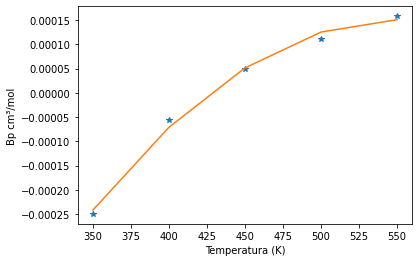

In [12]:
#vamos construir o gráfico para analisar qual das raízes fornece a temperatura de Boyle.

plt.plot(T,Bp,'*')
plt.plot(T,y(T))
plt.xlabel('Temperatura (K)')
plt.ylabel('Bp cm³/mol')
plt.show

A análise do gráfico mostra que a segunda raíz corresponde a temperatura de Boyle: 426.6 K.


## Exemplo 4

O segundo coeficiente do virial do metano pode ser obtido, de forma aproximada através da equação empírica $B(T) = a + be^{-c/T²}$, em que a=-0,1993 $bar^{-1}$, b=0,2002 $bar^{-1}$, c = 1131$K^2$, com 300K< T < 600 K. Qual o valor de temperatura do Boyle para o metano?

## **Solução**

Sabe-se que o valor do coeficiente virial é dependente da temperatura. Na temperatura de Boyle, o segundo coeficiente viral é nulo, B=0. Logo, temos o seguinte resultado:

$0 = a + be^{-c/T^2}$

$T_B = \sqrt{\frac{-c}{ln(-a/b)}}$

In [3]:
#Definindo variáveis

a=-0.1993     #bar^-1
b= 0.2002     #bar^-1
c= 1131       #K^2

T = np.sqrt(-c/(np.log(-a/b)))

print('Temperatura (K) = ' + format(T,'6.4f'))

Temperatura (K) = 501.0177


## Exemplo 5

Estime o volume molar do $CO_2$, a 500 K e 100 atm, admitindo que o gás se comporta como um gás de Van der Waals. 

## **Solução**

É necessário encontrar uma expressão para o volume molar resolvendo a equação de van der Waals. A equação pode ser escrita da seguinte forma:

$(p + \frac{a}{V_m^2})(V_m-b)=RT$

A seguinte equação polinomial pode ser obtida:

$ pV_m - pb + \frac{a}{V_m} -\frac{ab}{V_m^2} = RT$

$pV_m^3 - pbV_m^2 + aV_m -ab = RTV_m^2$

$ pV_m^3 - (pb+RT)V_m^2 + aV_m -ab = 0 $

As raízes da última equação devem ser calculadas


    

In [8]:
#Definindo as variáveis segundo dados do livro.

a = 3.610       # dm^6 atm mol^-1
b = 4.29e-2    # dm^3 mol^-1
R = 0.082057    #L · atm · K−1 · mol−1  
T = 500         # K
p = 100         # atm

# 1) Criar um vetor com os coeficientes do polinômio
# os valores dos coeficientes foram calculados dentro do vetor 

coef = np.array([p, -(p*b+R*T), a, -a*b])

# 2) Calcular as raízes, no caso de mais de uma raíz real, o valor correto será próximo a volume do gás ideal

raiz = np.roots(coef)

# Imprimindo as raízes
print('Raíz 1 = ' + format(raiz[0] , ' 6.5e')) 
print('Raíz 2 = ' + format(raiz[1] , ' 6.5e')) 
print('Raíz 3 = ' + format(raiz[2] , ' 6.5e')) 


Raíz 1 =  3.66141e-01+0.00000e+00j
Raíz 2 =  4.35218e-02+4.83282e-02j
Raíz 3 =  4.35218e-02-4.83282e-02j


 O volume molar é 0,366 L, pois só existe uma raíz real. 

## Exemplo 6

Uma substância elementar e bem conhecida como o argônio ainda é objeto de bastante pesquisa. Stewart e Jacobsen publicaram uma revisão das propriedades termodinâmicas do argônio, entre as quais a seguinte isoterma a 300K.
 
     
|   |   |   |   |   |   |   |   |   |   |   | 
|---|---|---|---|---|---|---|---|---|---|---|
|p (MPa)   |  0.4000| 0.5000| 0.6000| 0.8000| 1.000| 1.500| 2.000| 2.500| 3.000| 4.000|
|$V_m$ (dm³/mol)| 6.2208|4.9736|4.1423|3.1031|2.4795|1.6483|1.2328|0.98357|0.81746|0.60998|
     
     
a) Calcule o segundo coeficiente virial B, na temperatura informada. B)Estime o terceiro coeficiente virial,C, na temperatura mencionada.

## Solução

Podemos escrever a equação de estado da seguinte forma:

$ \frac{pV_m}{RT} = 1 + \frac{B}{V_m} + \frac{C}{V_m^2} + ...$

Em primeira aproximação pode ser feito uma gráfico de $ \frac{pV_m}{RT}$ versus $ \frac{1}{V_m} $ e depois ser ajustada uma função de primeiro grau aos dados. O  coeficiente angular será o segundo coeficiente do virial. O terceiro coeficiente do virial pode ser obtido pelo ajuste de uma função do segundo grau.

In [18]:
# Definindo variáveis

T = 300      #K
R = 8.314e-3    #dm3 · MPa · K−1 · mol−1   


p = np.array ([0.4000,0.5000, 0.6000, 0.8000, 1.000, 1.500, 2.000, 2.500, 3.000, 4.000])             #MPa
vm =np.array([6.2208,4.9736,4.1423,3.1031,2.4795,1.6483,1.2328,0.98357,0.81746,0.60998])        # Em dm^-3

Coef = p*vm / (R * T)

# Cálculo de 1/Vm para plotar o  gráfico de interseção 

InversoVm = 1 / vm

deg = 1
z = np.polyfit(InversoVm, Coef, deg)
y = np.poly1d(z)

# O segundo coeficiente do virial está relacionado ao coeficiente linear da regressão

print('coeficiente angular =', format(z[0] , 'f'))  
print('coeficiente linear =', format(z[1] , 'f')) 

print ('B =' + format(z[0], 'f'))


coeficiente angular = -0.013239
coeficiente linear = 0.999541
B =-0.013239


De acordo com os valores acima, a equação da reta é y = -0.013239x + 0,999541
A interseção em y é próximo ao valor de 1. De acordo com o valor da reta, temos **B = -0.013239**

In [19]:
#Encontrando o Terceiro Coeficiente da Equação do Virial - C

deg = 2
z1 = np.polyfit(InversoVm, Coef, deg)
y1 = np.poly1d(z1)


print('Valor de C (dm^6 mol^-2)=', format(z1[0] , 'f'))  
print('Valor de B (dm³ mol^-1) =', format(z1[1] , 'f')) 

Valor de C (dm^6 mol^-2)= 0.001063
Valor de B (dm³ mol^-1) = -0.015026


Observe que o segundo coeficiente do virial é modificado de acordo com a função ajustada.
Vamos comparar os ajustes olhando para o gráfico.

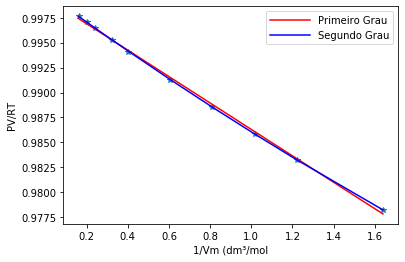

In [22]:
plt.plot(InversoVm, Coef, "*")
plt.plot(InversoVm, y(InversoVm), color='red', label='Primeiro Grau')
plt.plot(InversoVm, y1(InversoVm), color='blue', label='Segundo Grau')
plt.ylabel('PV/RT')
plt.xlabel('1/Vm (dm³/mol')
plt.legend(handlelength=4,loc='best')
plt.show()